In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import scipy.integrate as integ
import ipywidgets as widgets

# Graficzna interpretacja równań różniczkowych

## 1D - Model populacji (Verhulst)

Na początku rozważmy prosty model populacji, w którym szybkość wzrostu jest proporcjonalna do liczby osobników

$$\frac{dN}{dt} = rN.$$

W modelu tym istnieje jeden niestabilny punkt stały dla $N=0$. Dla niezerowych $N$ liczba osobników będzie zawsze rosła.

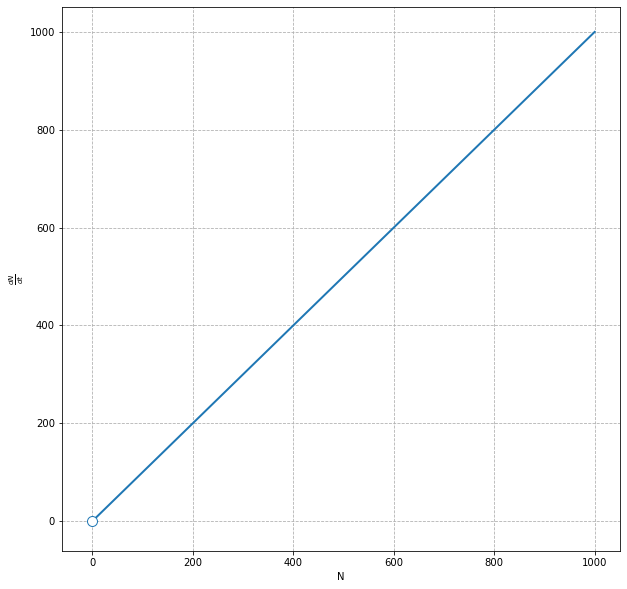

In [3]:
r = 1
N = np.linspace(0, 1000, 100)
dN = r * N

plt.figure(figsize = (10, 10))
plt.plot(N, dN, linewidth = 2)
plt.grid(linestyle = '--')
plt.xlabel('N')
plt.ylabel(r'$\frac{dN}{dt}$')
plt.scatter(0, 0, edgecolors = 'C0', facecolors = 'white', zorder = 3, s = 100)

Możemy jakościowo przewidzieć postać rozwiązań tego równania, rysując na wykresie strzałki odpowiadające polu wektorowemu

$$\vec{F}(t, N) = \left[t, \frac{dN}{dt}\right]=\left[t, rN\right].$$

Rozwiązania równania, dla danych warunków początkowych $[t_0, N_0]$, będą zawsze styczne do tych strzałek.

(-20, 1000)

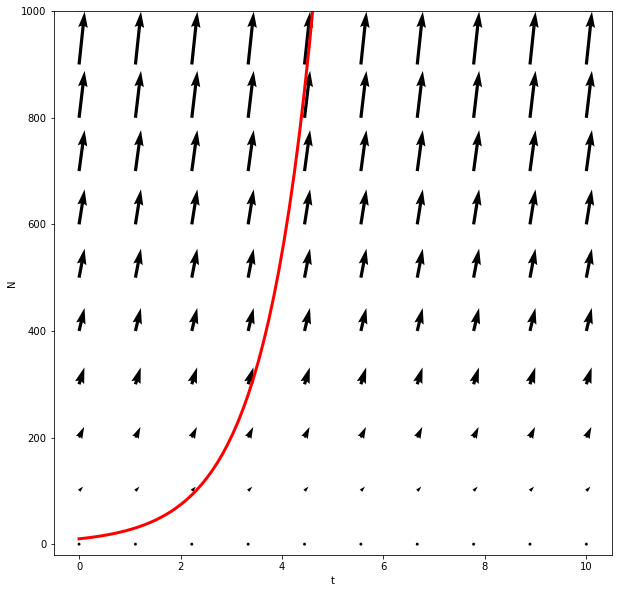

In [4]:
r = 1
ts = np.linspace(0, 10, 10)
Ns = np.linspace(0, 1000, 11)
TS, NS = np.meshgrid(ts, Ns)
VT, VN = np.ones((11, 10)), r * NS
norm = np.sqrt(VT**2 + VN**2)
#VT /= norm
#VN /= norm
plt.figure(figsize = (10, 10))
plt.quiver(TS, NS, VT, VN, angles = 'xy')

tn = np.linspace(0, 10, 100)
xs = integ.odeint(lambda x, t: r * x, 10, tn)
plt.plot(tn, xs[:, 0], 'r-', linewidth = 3)
plt.xlabel('t')
plt.ylabel('N')

plt.ylim((-20, 1000))

Bardziej reslistyczny model uzyskamy, jeżeli tylko uwzględnimy skończoną pojemność układu 

$$\frac{dN}{dt} = r\left(1-\frac{N}{K}\right)N.$$

Z powyższego równania wynika, że po przekroczeniu przez populację pewnego progu liczebności, określonego przez współczynnik $K$, tempo wzrostu staje się ujemne - populacja zaczyna maleć. Warto zauważyć, że dla małych wartości $N$, oba modele mają bardzo podobną dynamikę. Rozbieżności stają się jednak coraz bardziej widoczne wraz z upływem czasu i wzrostem populacji.

(0, 15)

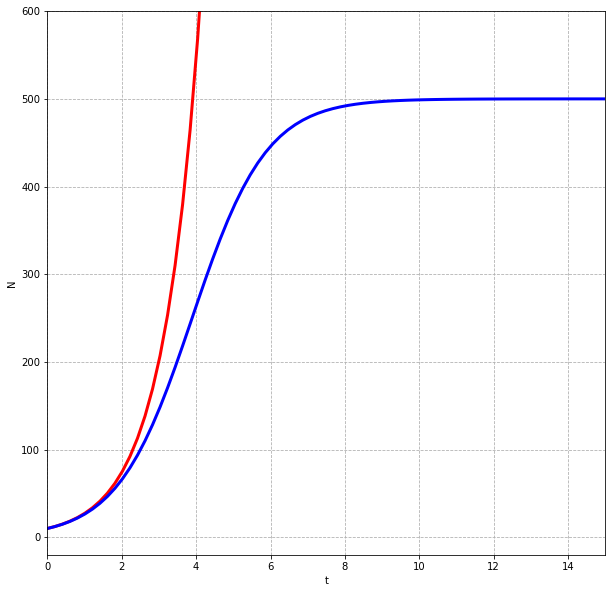

In [16]:
r = 1
K = 500
tn = np.linspace(0, 20, 100)
xs = integ.odeint(lambda x, t: r * x, 10, tn)
ys = integ.odeint(lambda x, t: r * (1 - x / K) * x, [10, 800], tn)
plt.figure(figsize = (10, 10))
plt.plot(tn, xs[:, 0], 'r-', linewidth = 3)
plt.plot(tn, ys[:, 0], 'b-', linewidth = 3)
plt.grid(ls = '--')
plt.xlabel('t')
plt.ylabel('N')
plt.ylim((-20, 600))
plt.xlim((0, 15))

Zmodyfikowany w powyższy sposób model ma już dwa punkty stałe. Jeden z nich, dla $N = 0$, jest niestabilny. Oznacza to, że jeżeli wybijemy układ z tego punktu równowagi, to populacja zacznie rosnąć. Drugi, odpowiadający $N = K$, jest stabilny - układ wybity z tego punktu wróci do niego.

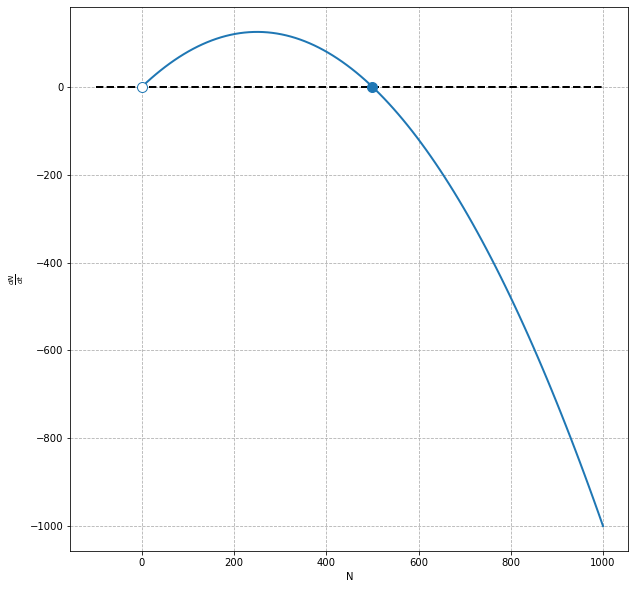

In [5]:
r = 1
K = 500
N = np.linspace(0, 1000, 100)
dN = r * (1 - N / K) * N

plt.figure(figsize = (10, 10))
plt.plot(N, dN, linewidth = 2)
plt.grid(linestyle = '--')
plt.xlabel('N')
plt.ylabel(r'$\frac{dN}{dt}$')
plt.hlines(0, -100, 1000, linestyle = '--', linewidth = 2)
plt.scatter(0, 0, edgecolors = 'C0', facecolors = 'white', zorder = 3, s = 100)
plt.scatter(K, 0, edgecolors = 'C0', facecolors = 'C0', zorder = 3, s = 100)

Można to wyraźnie zaobserwować, jeżeli tylko narysujemy pole wektorowe odpowiadające temu równaniu, czyli 
$$\vec{F}(t, N) = \left[t, \frac{dN}{dt}\right]=\left[t, r\left(1-\frac{N}{K}\right)N\right].$$
Widać, że pomijając przypadek $N_0 = 0$, strzałki pola prowadzą w kierunku linii $N = K$.

(-20, 1000)

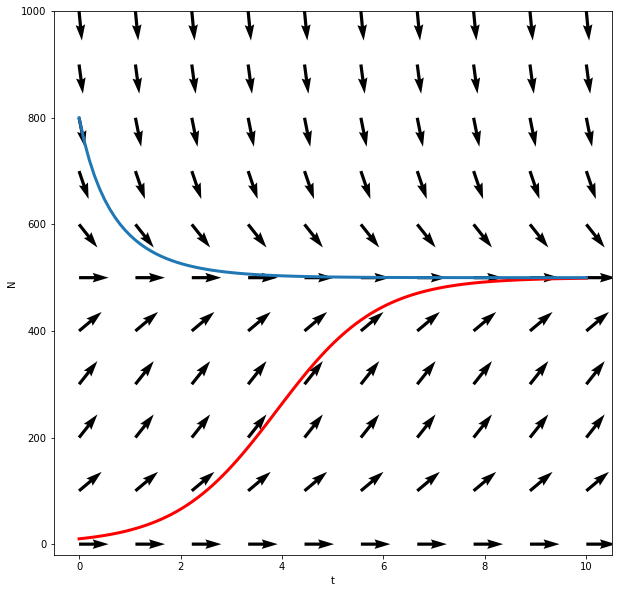

In [6]:
r = 1
K = 500
ts = np.linspace(0, 10, 10)
Ns = np.linspace(0, 1000, 11)
TS, NS = np.meshgrid(ts, Ns)
VT, VN = np.ones((11, 10)), r * (1 - NS / K) * NS
norm = np.sqrt(VT**2 + VN**2)
VT /= norm
VN /= norm
plt.figure(figsize = (10, 10))
plt.quiver(TS, NS, VT, VN, angles = 'xy')

tn = np.linspace(0, 10, 100)
xs = integ.odeint(lambda x, t: r * (1 - x / K) * x, [10, 800], tn)
plt.plot(tn, xs[:, 0], 'r-', tn, xs[:, 1], 'C0-', linewidth = 3)
plt.xlabel('t')
plt.ylabel('N')
plt.ylim((-20, 1000))

# Wizualizacja równań różniczkowych drugiego rzędu

Jeżeli mamy do czynienia z układem dwóch równań różniczkowych pierwszego rzędu
$$\frac{dx}{dt}=F_{x}(x, y),$$
$$\frac{dy}{dt}=F_{y}(x, y),$$
to możemy taki układ zapisać w bardziej zwięzłej, wektorowej formie. Jeżeli tylko przyjmiemy, że
$$\vec{z} = [x, y],$$
wówczas powyższy układ redukuje się do
$$\frac{d\vec{z}}{dt} = \left[\frac{dx}{dt}, \frac{dy}{dt}\right] = \left[F_{x}(x, y), F_{y}(x, y)\right].$$

Jeżeli tylko zrobimy wykres, na którym oś X odpowiada zmiennej $x$, a oś $Y$ odpowiada zmiennej $y$, i naniesiemy na ten wykres strzałki pola wektorowego
$$\left[F_{x}(x, y), F_{y}(x, y)\right],$$
to rozwiązania powyższego układu równań będą musiały być do tych strzałek równoległe. Pozwala nam to na graficzną analizę rozwiązań układu równań bez potrzeby rozwiązania analitycznego.

W mechanice klasycznej najczęściej będziemy mieli do czynienia z równaniem Newtona, czyli rówaniem drugiego rzędu
$$\frac{d^2x}{dt^2} = \frac{F(x, v)}{m}.$$
Po skorzystaniu z tego, że
$$\frac{dx}{dt}=v,$$
równanie Newtona można przedstawić, w równoważnej formie, jako ukłąd dwóch równań
$$\frac{dx}{dt}=v,$$
$$\frac{dv}{dt} = \frac{F(x, v)}{m}.$$

Przedstawienie na wykresie pola wektorowego
$$\left[v, \frac{F(x, v)}{m}\right]$$
może dostarczyć ciekawych informacji na temat dynamiki analizowanych układów bez potrzeby bezpośredniego rozwiązania równań różniczkowych. Poniżej znajduje się kilka przykładów.

## Ciało poruszające się z zerowym przyspieszeniem

Układ równań:
$$\frac{dx}{dt}=v$$
$$\frac{dv}{dt}=0$$
czyli:
$$\frac{d^2x}{dt^2}=0$$

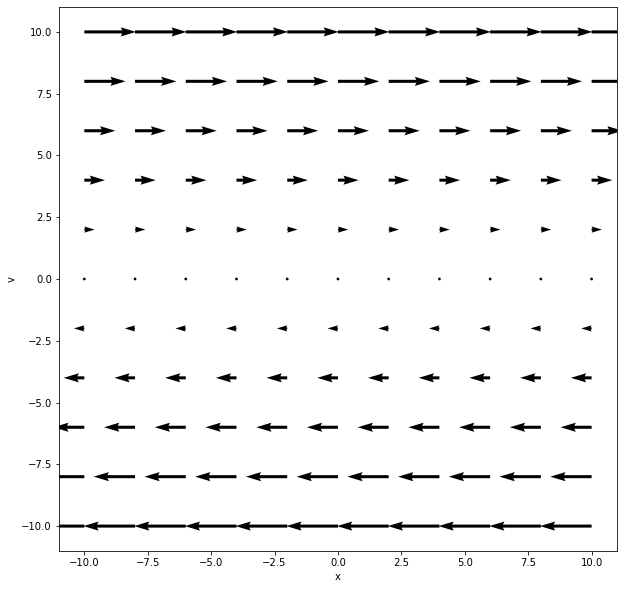

In [8]:
x = np.linspace(-10, 10, 11)
v = np.linspace(-10, 10, 11)
x, v = np.meshgrid(x, v)

def field(x, v):
    return v, np.zeros(x.shape)

fx, fv = field(x, v)

plt.figure(figsize = (10, 10))
plt.xlabel('x')
plt.ylabel('v')
#plt.grid(linestyle = '--')
plt.quiver(x, v, fx, fv, zorder = 2, angles = 'xy')

## Ciało poruszające się ze stałym przyspieszeniem $c$

Układ równań:
$$\frac{dx}{dt}=v$$
$$\frac{dv}{dt}=c$$
czyli:
$$\frac{d^2x}{dt^2}=c$$

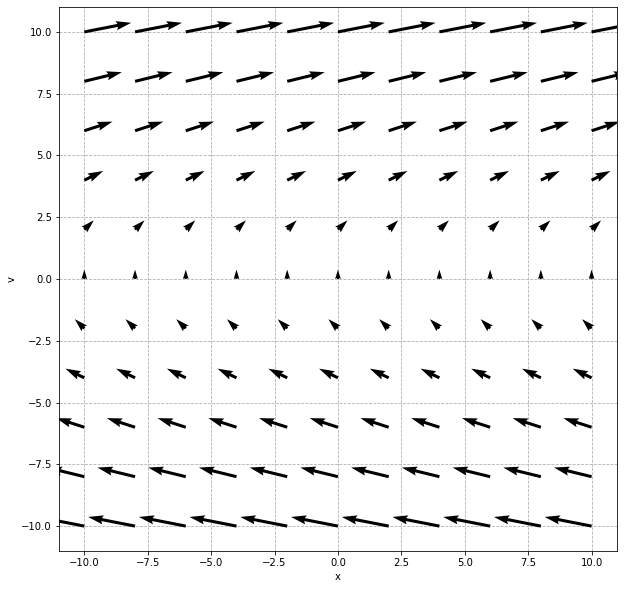

In [9]:
x = np.linspace(-10, 10, 11)
v = np.linspace(-10, 10, 11)
x, v = np.meshgrid(x, v)

def field(x, v, c):
    return v, c * np.ones(x.shape)

fx, fv = field(x, v, 2)

plt.figure(figsize = (10, 10))
plt.xlabel('x')
plt.ylabel('v')
plt.grid(linestyle = '--')
plt.quiver(x, v, fx, fv, zorder = 2, angles = 'xy')

## Ciało poruszające się z przyspieszeniem $a = -bv$

Układ równań:
$$\frac{dx}{dt}=v$$
$$\frac{dv}{dt}=-bv$$
czyli:
$$\frac{d^2x}{dt^2}=-bv$$

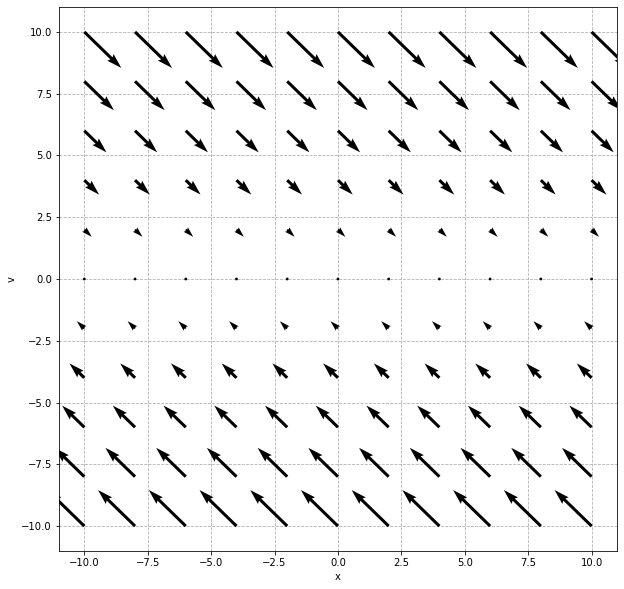

In [10]:
x = np.linspace(-10, 10, 11)
v = np.linspace(-10, 10, 11)
x, v = np.meshgrid(x, v)

def field(x, v, b):
    return v, -b * v

fx, fv = field(x, v, 1)

plt.figure(figsize = (10, 10))
plt.xlabel('x')
plt.ylabel('v')
plt.grid(linestyle = '--')
plt.quiver(x, v, fx, fv, zorder = 2, angles = 'xy')

## Ciało poruszające się z przyspieszeniem $a = - kx$

Układ równań:
$$\frac{dx}{dt}=v$$
$$\frac{dv}{dt}=-kx$$
czyli:
$$\frac{d^2x}{dt^2}=-kx$$

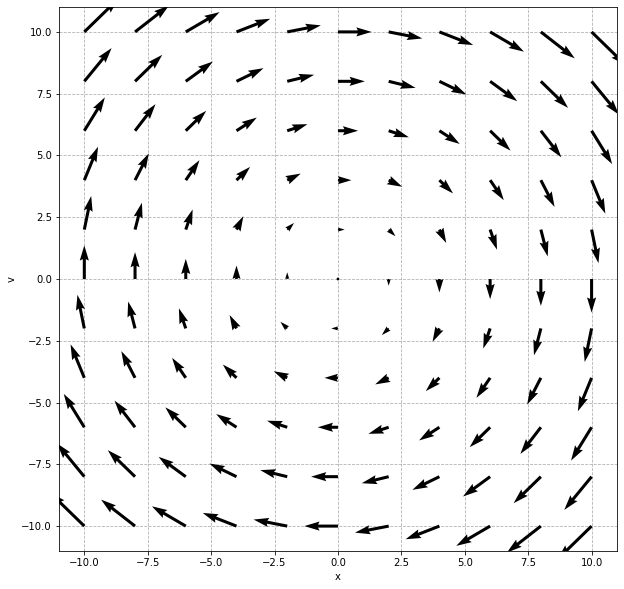

In [11]:
x = np.linspace(-10, 10, 11)
v = np.linspace(-10, 10, 11)
x, v = np.meshgrid(x, v)

def field(x, v, k):
    return v, -k * x

fx, fv = field(x, v, 1)

plt.figure(figsize = (10, 10))
plt.xlabel('x')
plt.ylabel('v')
plt.grid(linestyle = '--')
plt.quiver(x, v, fx, fv, zorder = 2, angles = 'xy')

## Ciało poruszające się z przyspieszeniem $a = - kx - bv$

Układ równań:
$$\frac{dx}{dt}=v$$
$$\frac{dv}{dt}=-kx-bv$$
czyli:
$$\frac{d^2x}{dt^2}=-kx-bv$$

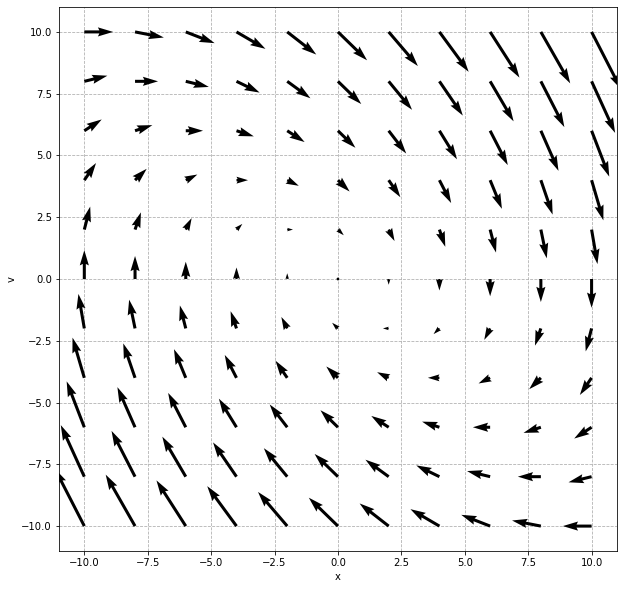

In [12]:
x = np.linspace(-10, 10, 11)
v = np.linspace(-10, 10, 11)
x, v = np.meshgrid(x, v)

def field(x, v, k, b):
    return v, -k * x - b * v

fx, fv = field(x, v, 1, 1)

plt.figure(figsize = (10, 10))
plt.xlabel('x')
plt.ylabel('v')
plt.grid(linestyle = '--')
plt.quiver(x, v, fx, fv, zorder = 2, angles = 'xy')